In [1]:
from IPython.display import HTML, display

import torch
import numpy as np
import matplotlib.pyplot as plt

import settings
from find_similar import l1_loss, cosine_dist
from inference import Inference
from model import Autoencoder

In [2]:
np.random.seed(42)
model = Autoencoder(settings.BOARD_SHAPE, settings.LATENT_SIZE).to(settings.DEVICE)
model.load_state_dict(torch.load(settings.CODER_PATH, map_location=settings.DEVICE))
model.eval()

test = Inference(
    settings.DEVICE,
    model.coder,
)

In [3]:
pieces_name = "img/60px-Chess_{}.png"
pieces_path = {
    "P": "plt",
    "B": "blt",
    "N": "nlt",
    "R": "rlt",
    "Q": "qlt",
    "K": "klt",
    "p": "pdt",
    "b": "bdt",
    "n": "ndt",
    "r": "rdt",
    "q": "qdt",
    "k": "kdt",
}
def display_fen(fen):
    fen = fen.split(' ')
    board_fen = fen[0]
    table = display_board(board_fen)
    player = fen[1]
    castling = fen[2].replace('K', '♔').replace('Q', '♕').replace('k', '♚').replace('q', '♛')
    return (table, castling, player)
    
def display_board(fen):
    table = ''
    for y, i in enumerate(fen.split("/")):
        table += '<tr>\n'
        x = 0
        for j in i:
            if j.isnumeric():
                for k in range(int(j)):
                    table += '\t<td class="{}"></td>\n'.format('dark' if (x+y)%2 else 'light')
                    x += 1
            else:
                img = '<img src="{}">'.format(pieces_name.format(pieces_path[j]))
                table += '\t<td class="{}">{}</td>\n'.format('dark' if (x+y)%2 else 'light', img)
                x += 1
        table += '</tr>\n'
    return table

In [4]:
html = '''<!DOCTYPE html>
<html>
    <head>
        <title></title>
        <meta charset="UTF-8">
        <style>
            .chess-board { border-spacing: 0; border-collapse: collapse; margin-bottom: -1em; }
            .chess-board th { padding: .5em; }
            .chess-board td { border: 1px solid; width: 50px; height: 50px; }
            .chess-board .light { background: whitesmoke; }
            .chess-board .dark { background: sienna }
        </style>
    </head>
    <body>
        <table>
            <tbody>
                <tr>
                    <td style="text-align: center">
                        <h1> First: </h1>
                        <table class="chess-board">
                            <tbody>
                                %s
                            </tbody>
                        </table>
                        <h2 style="margin-bottom: 0em">castling: %s </h2>
                        <h2 style="margin-top: 0.5em">moves: %s</h2>
                    </td>
                    <td style="text-align: center">
                        <h1> Second: </h1>
                        <table class="chess-board">
                            <tbody>
                                %s
                            </tbody>
                        </table>
                        <h2 style="margin-bottom: 0em">castling: %s </h2>
                        <h2 style="margin-top: 0.5em">moves: %s</h2>
                    </td>
                </tr>
            </tbody>
        </table>
    </body>
</html>'''

# Test cases

### Template code - copy it for next case
```py
fen_1 = ...
fen_2 = ...
fen_1 += ' - 0 1' # complete FEN with en passant and moves numbers
fen_2 += ' - 0 1'
pred_1, pred_2 = test.predict([fen_1, fen_2])
l1 = l1_loss([pred_1.tolist()], pred_2.tolist())[0]
cos_d = cosine_dist([pred_1.tolist()], pred_2.tolist())[0]
display(HTML(html % (display_fen(fen_1) + display_fen(fen_2))))
display(HTML(f'<h2>L1 loss: {l1}</h2>'))
display(HTML(f'<h2>Cosine distance: {cos_d}</h2>'))
```

In [5]:
fen_1 = 'rn1q1bnr/pp2pp2/8/6k1/8/7K/PPP1PP1P/RN1Q1B1R b - -'
fen_2 = 'rn1q1bnr/pp2pp2/6k1/8/8/7K/PPP1PP1P/RN1Q1B1R b -'
fen_1 += ' 0 1' # complete FEN with en passant and moves numbers
fen_2 += ' - 0 1'
pred = test.predict([fen_1, fen_2])[0]
pred_1, pred_2 = pred[0], pred[1]
l1 = l1_loss([pred_1.tolist()], pred_2.tolist())[0]
cos_d = cosine_dist([pred_1.tolist()], pred_2.tolist())[0]
display(HTML(html % (display_fen(fen_1) + display_fen(fen_2))))
display(HTML(f'<h2>L1 loss: {l1}</h2>'))
display(HTML(f'<h2>Cosine distance: {cos_d}</h2>'))

,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


In [6]:
fen_1 = 'rnbqkbnr/pppp1ppp/4p3/8/8/4P3/PPPP1PPP/RNBQKBNR w KQkq'
fen_2 = 'rnbqkbnr/pppp1ppp/4p3/8/8/4P3/PPPP1PPP/RNBQKBNR w -'
fen_1 += ' - 0 1' # complete FEN with en passant and moves numbers
fen_2 += ' - 0 1'
pred = test.predict([fen_1, fen_2])
pred_1, pred_2 = pred[0], pred[1]
l1 = l1_loss([pred_1.tolist()], pred_2.tolist())[0]
cos_d = cosine_dist([pred_1.tolist()], pred_2.tolist())[0]
display(HTML(html % (display_fen(fen_1) + display_fen(fen_2))))
display(HTML(f'<h2>L1 loss: {l1}</h2>'))
display(HTML(f'<h2>Cosine distance: {cos_d}</h2>'))

,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


In [7]:
fen_1 = 'rnbqkbnr/1ppp1pp1/p3p2p/8/8/P3P2P/1PPP1PP1/RNBQKBNR w KQkq'
fen_2 = 'rnbqkbnr/1ppp1pp1/p3p2p/8/8/P3P2P/1PPP1PP1/RNBQKBNR w -'
fen_1 += ' - 0 1' # complete FEN with en passant and moves numbers
fen_2 += ' - 0 1'
pred = test.predict([fen_1, fen_2])[0]
pred_1, pred_2 = pred[0], pred[1]
l1 = l1_loss([pred_1.tolist()], pred_2.tolist())[0]
cos_d = cosine_dist([pred_1.tolist()], pred_2.tolist())[0]
display(HTML(html % (display_fen(fen_1) + display_fen(fen_2))))
display(HTML(f'<h2>L1 loss: {l1}</h2>'))
display(HTML(f'<h2>Cosine distance: {cos_d}</h2>'))

,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


In [8]:
fen_1 = 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq'
fen_2 = 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w -'
fen_1 += ' - 0 1' # complete FEN with en passant and moves numbers
fen_2 += ' - 0 1'
pred = test.predict([fen_1, fen_2])
pred_1, pred_2 = pred[0], pred[1]
l1 = l1_loss([pred_1.tolist()], pred_2.tolist())[0]
cos_d = cosine_dist([pred_1.tolist()], pred_2.tolist())[0]
display(HTML(html % (display_fen(fen_1) + display_fen(fen_2))))
display(HTML(f'<h2>L1 loss: {l1}</h2>'))
display(HTML(f'<h2>Cosine distance: {cos_d}</h2>'))

,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


In [9]:
fen_1 = 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq'
fen_2 = 'rnbqkbnr/pppppppp/8/8/8/5P2/PPPPP1PP/RNBQKBNR b KQkq'
fen_1 += ' - 0 1' # complete FEN with en passant and moves numbers
fen_2 += ' - 0 1'
pred = test.predict([fen_1, fen_2])[0]
pred_1, pred_2 = pred[0], pred[1]
l1 = l1_loss([pred_1.tolist()], pred_2.tolist())[0]
cos_d = cosine_dist([pred_1.tolist()], pred_2.tolist())[0]
display(HTML(html % (display_fen(fen_1) + display_fen(fen_2))))
display(HTML(f'<h2>L1 loss: {l1}</h2>'))
display(HTML(f'<h2>Cosine distance: {cos_d}</h2>'))

,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


In [10]:
fen_1 = 'rnbqkbnr/pp1ppppp/8/2p5/5P2/8/PPPPP1PP/RNBQKBNR w KQkq'
fen_2 = 'rnbqkbnr/pppppppp/8/8/5P2/8/PPPPP1PP/RNBQKBNR b KQkq'
fen_1 += ' - 0 1' # complete FEN with en passant and moves numbers
fen_2 += ' - 0 1'
pred = test.predict([fen_1, fen_2])[0]
pred_1, pred_2 = pred[0], pred[1]
l1 = l1_loss([pred_1.tolist()], pred_2.tolist())[0]
cos_d = cosine_dist([pred_1.tolist()], pred_2.tolist())[0]
display(HTML(html % (display_fen(fen_1) + display_fen(fen_2))))
display(HTML(f'<h2>L1 loss: {l1}</h2>'))
display(HTML(f'<h2>Cosine distance: {cos_d}</h2>'))

,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


In [11]:
fen_1 = 'rnbqkb1r/pppp1ppp/7n/4p3/4P3/5Q2/PPPP1PPP/RNB1KBNR w KQkq'
fen_2 = 'rnbqkb1r/pp1ppppp/5n2/2p5/2P5/1Q6/PP1PPPPP/RNB1KBNR w KQkq'
fen_1 += ' - 0 1' # complete FEN with en passant and moves numbers
fen_2 += ' - 0 1'
pred_1, pred_2 = test.predict([fen_1, fen_2])
l1 = l1_loss([pred_1.tolist()], pred_2.tolist())[0]
cos_d = cosine_dist([pred_1.tolist()], pred_2.tolist())[0]
display(HTML(html % (display_fen(fen_1) + display_fen(fen_2))))
display(HTML(f'<h2>L1 loss: {l1}</h2>'))
display(HTML(f'<h2>Cosine distance: {cos_d}</h2>'))

,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


In [12]:
fen_1 = '8/8/8/8/8/8/8/8 w -'
fen_2 = '4k3/8/8/8/8/8/8/8 w -'
fen_1 += ' - 0 1' # complete FEN with en passant and moves numbers
fen_2 += ' - 0 1'
pred_1, pred_2 = test.predict([fen_1, fen_2])
l1 = l1_loss([pred_1.tolist()], pred_2.tolist())[0]
cos_d = cosine_dist([pred_1.tolist()], pred_2.tolist())[0]
display(HTML(html % (display_fen(fen_1) + display_fen(fen_2))))
display(HTML(f'<h2>L1 loss: {l1}</h2>'))
display(HTML(f'<h2>Cosine distance: {cos_d}</h2>'))

,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,
,,,,,,,


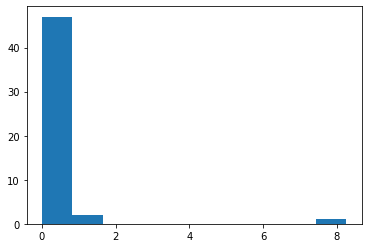

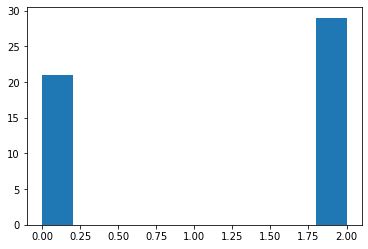

In [13]:
import io
from random import sample, seed
seed(42)
import chess.pgn
path = r'C:\Users\Kuba\Desktop\sth.pgn'
with open(path) as f:
    pgns = f.readlines()
fens = []
for pgn in pgns[:200]:
    game = io.StringIO(pgn)
    game = chess.pgn.read_game(game)
    game = game.next()
    while game:
        fens.append(game.board().fen())
        game = game.next()

l1s = []
cos_ds = []
new_fens = []
for i in range(50):
    fen_1, fen_2 = sample(fens, k=2)
    pred = test.predict([fen_1, fen_2])[0]
    pred_1, pred_2 = pred[0], pred[1]
    l1 = l1_loss([pred_1.tolist()], pred_2.tolist())[0]
    cos_d = cosine_dist([pred_1.tolist()], pred_2.tolist())[0]
    l1s.append(l1)
    cos_ds.append(cos_d)
    new_fens.append((fen_1, fen_2, l1, cos_d))
for fen_1, fen_2, l1, cos_d in sorted(new_fens, key=lambda t: t[2]):
    display(HTML(html % (display_fen(fen_1) + display_fen(fen_2))))
    display(HTML(f'<h2>L1 loss: {l1}</h2>'))
    display(HTML(f'<h2>Cosine distance: {cos_d}</h2>'))
plt.hist(l1s)
plt.show()
plt.hist(cos_ds)
plt.show()